In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier

In [3]:
def resizeplot(x,y,d):
    plt.figure(figsize=(x,y),dpi=d)

In [58]:
imputer = KNNImputer(missing_values=float ,n_neighbors=5,metric='nan_euclidian',weights='uniform')

In [48]:
df = pd.read_csv('DATA/airline_tweets.csv')

In [137]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,unknown,0.0000,Virgin America,unknown,cairdin,unknown,0,@VirginAmerica What @dhepburn said.,unknown,2015-02-24 11:35:52 -0800,unknown,Eastern Time (US & Canada)
1,positive,0.3486,unknown,0.0000,Virgin America,unknown,jnardino,unknown,0,@VirginAmerica plus you've added commercials t...,unknown,2015-02-24 11:15:59 -0800,unknown,Pacific Time (US & Canada)
2,neutral,0.6837,unknown,0.0000,Virgin America,unknown,yvonnalynn,unknown,0,@VirginAmerica I didn't today... Must mean I n...,unknown,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,unknown,jnardino,unknown,0,@VirginAmerica it's really aggressive to blast...,unknown,2015-02-24 11:15:36 -0800,unknown,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,unknown,jnardino,unknown,0,@VirginAmerica and it's a really big bad thing...,unknown,2015-02-24 11:14:45 -0800,unknown,Pacific Time (US & Canada)


In [50]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [88]:
df.isnull().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
text                            0
tweet_coord                     0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

In [53]:
df['negativereason'].fillna('unknown',inplace=True)

In [62]:
df['negativereason_confidence'].mean()

0.45875508879781424

In [56]:
df['negativereason_confidence'].unique()

array([   nan, 0.    , 0.7033, ..., 0.6234, 0.644 , 0.7255])

In [60]:
df['negativereason_confidence'].fillna(0,inplace=True)

In [61]:
df['negativereason_confidence'] = imputer.fit_transform(df[['negativereason_confidence']])

In [64]:
df['airline_sentiment_gold'].unique()

array([nan, 'negative', 'neutral', 'positive'], dtype=object)

In [68]:
df['airline_sentiment_gold'].value_counts()

unknown     14600
negative       32
positive        5
neutral         3
Name: airline_sentiment_gold, dtype: int64

In [67]:
df['airline_sentiment_gold'].fillna('unknown',inplace=True)

In [72]:
df['negativereason_gold'].unique()

array([nan, 'Late Flight\nFlight Attendant Complaints',
       'Late Flight\nLost Luggage', 'Late Flight',
       'Customer Service Issue', "Can't Tell",
       'Cancelled Flight\nCustomer Service Issue', 'Cancelled Flight',
       'Bad Flight', 'Lost Luggage\nDamaged Luggage',
       'Late Flight\nCancelled Flight', 'Flight Attendant Complaints',
       'Customer Service Issue\nLost Luggage',
       "Customer Service Issue\nCan't Tell"], dtype=object)

In [75]:
df['negativereason_gold'].value_counts()

unknown                                     14608
Customer Service Issue                         12
Late Flight                                     4
Can't Tell                                      3
Cancelled Flight                                3
Cancelled Flight\nCustomer Service Issue        2
Flight Attendant Complaints                     1
Lost Luggage\nDamaged Luggage                   1
Customer Service Issue\nCan't Tell              1
Late Flight\nFlight Attendant Complaints        1
Bad Flight                                      1
Late Flight\nCancelled Flight                   1
Late Flight\nLost Luggage                       1
Customer Service Issue\nLost Luggage            1
Name: negativereason_gold, dtype: int64

In [74]:
df['negativereason_gold'].fillna('unknown',inplace=True)

In [81]:
df['tweet_coord'].fillna('unknown',inplace=True)

In [84]:
df['tweet_location'].unique()

array([nan, 'Lets Play', 'San Francisco CA', ..., 'Columbus, OH, USA',
       'Milwaukee County, Wisconsin', 'Nigeria,lagos'], dtype=object)

In [85]:
df['tweet_location'].fillna('unknown',inplace=True)

In [87]:
df['user_timezone'].fillna('unknown',inplace=True)

<AxesSubplot:xlabel='negativereason', ylabel='count'>

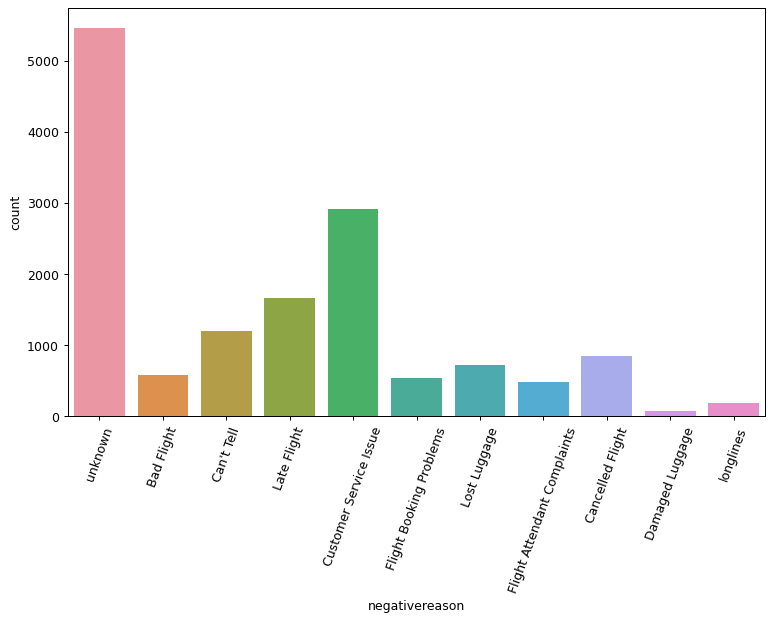

In [89]:
resizeplot(10,6,90)
plt.xticks(rotation=70);
sns.countplot(x='negativereason',data=df)

In [90]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,unknown,0.0000,Virgin America,unknown,cairdin,unknown,0,@VirginAmerica What @dhepburn said.,unknown,2015-02-24 11:35:52 -0800,unknown,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,unknown,0.0000,Virgin America,unknown,jnardino,unknown,0,@VirginAmerica plus you've added commercials t...,unknown,2015-02-24 11:15:59 -0800,unknown,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,unknown,0.0000,Virgin America,unknown,yvonnalynn,unknown,0,@VirginAmerica I didn't today... Must mean I n...,unknown,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,unknown,jnardino,unknown,0,@VirginAmerica it's really aggressive to blast...,unknown,2015-02-24 11:15:36 -0800,unknown,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,unknown,jnardino,unknown,0,@VirginAmerica and it's a really big bad thing...,unknown,2015-02-24 11:14:45 -0800,unknown,Pacific Time (US & Canada)


<AxesSubplot:>

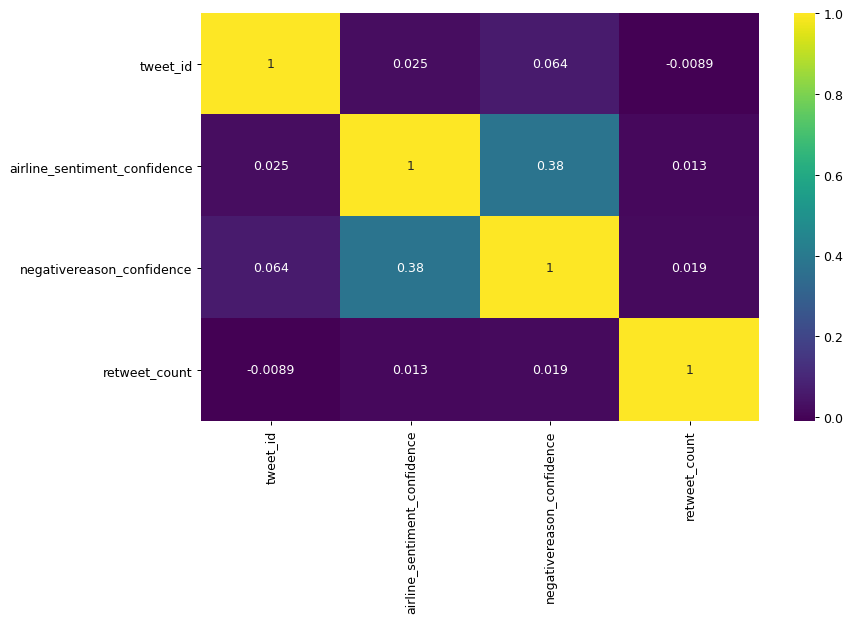

In [92]:
resizeplot(10,6,90)
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [96]:
df.drop('tweet_id',axis=1,inplace=True)

In [98]:
df.groupby('airline_sentiment').describe().transpose()

airline_sentiment                      negative      neutral     positive
airline_sentiment_confidence count  9178.000000  3099.000000  2363.000000
                             mean      0.933365     0.823303     0.872039
                             std       0.138109     0.185594     0.179478
                             min       0.339400     0.335000     0.335600
                             25%       1.000000     0.666050     0.677500
                             50%       1.000000     0.916000     1.000000
                             75%       1.000000     1.000000     1.000000
                             max       1.000000     1.000000     1.000000
negativereason_confidence    count  9178.000000  3099.000000  2363.000000
                             mean      0.731769     0.000000     0.000000
                             std       0.238276     0.000000     0.000000
                             min       0.312200     0.000000     0.000000
                             25%       0.645300     0.000000     0.000000
                             50%       0.680600     0.000000     0.000000
                             75%       1.000000     0.000000     0.000000
                             max       1.000000     0.000000     0.000000
retweet_count                count  9178.000000  3099.000000  2363.000000
                             mean      0.093375     0.060987     0.069403
                             std       0.792865     0.658037     0.659914
                             min       0.000000     0.000000     0.000000
                             25%       0.000000     0.000000     0.000000
                             50%       0.000000     0.000000     0.000000
                             75%       0.000000     0.000000     0.000000
                             max      44.000000    28.000000    22.000000

In [109]:
pd.DataFrame(df[['airline_sentiment','airline']].value_counts(),columns=['rated'])

rated
airline_sentiment airline              
negative          United           2633
                  US Airways       2263
                  American         1960
                  Southwest        1186
                  Delta             955
neutral           Delta             723
                  United            697
                  Southwest         664
positive          Southwest         570
                  Delta             544
                  United            492
neutral           American          463
                  US Airways        381
positive          American          336
                  US Airways        269
negative          Virgin America    181
neutral           Virgin America    171
positive          Virgin America    152

<AxesSubplot:xlabel='airline', ylabel='count'>

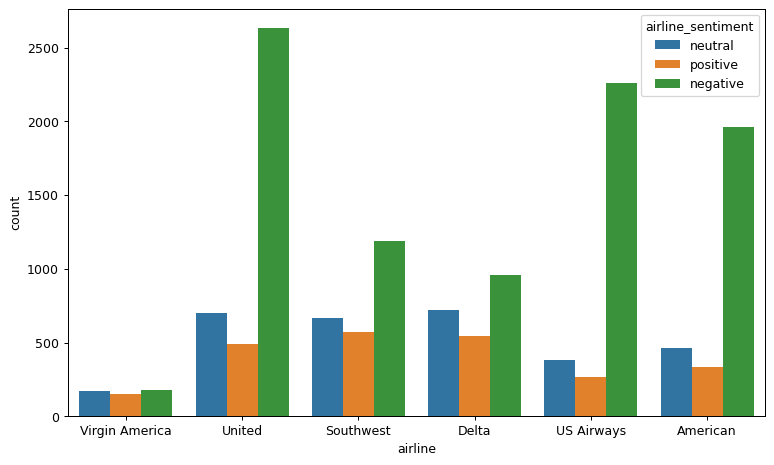

In [110]:
resizeplot(10,6,90)
sns.countplot(x='airline',hue='airline_sentiment',data=df)

In [120]:
pd.DataFrame(df[['airline_sentiment','tweet_location','airline']].value_counts(),columns=['Rated']).head(30)

Rated
airline_sentiment tweet_location    airline              
negative          unknown           United            844
                                    US Airways        836
                                    American          685
                                    Southwest         401
                                    Delta             321
neutral           unknown           Southwest         240
                                    United            223
positive          unknown           Southwest         183
neutral           unknown           Delta             159
                                    US Airways        151
                                    American          144
positive          unknown           Delta             138
                                    United            122
                                    American           82
                                    US Airways         82
neutral           USA               Delta              62
negative          unknown           Virgin America     55
neutral           unknown           Virgin America     45
negative          Washington, D.C.  US Airways         37
                  Washington, DC    US Airways         36
                  San Francisco, CA United             34
                  Boston, MA        US Airways         31
                  New York, NY      American           30
                  New York          United             28
                  Boston, MA        Delta              28
                  Pekin             American           28
                  Chicago, IL       United             27
                  San Francisco     United             27
                  Houston, TX       United             26
                  Chicago           United             25

In [115]:
df['tweet_location'].unique()

array(['unknown', 'Lets Play', 'San Francisco CA', ...,
       'Columbus, OH, USA', 'Milwaukee County, Wisconsin',
       'Nigeria,lagos'], dtype=object)

In [121]:
data = df[['airline_sentiment','text']]

In [122]:
data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [123]:
X = data['text']
y = data['airline_sentiment']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [134]:
tfid = TfidfVectorizer(stop_words='english')

tfid.fit(X_train)

X_train_tfid = tfid.transform(X_train)
X_test_tfid = tfid.transform(X_test)

In [135]:
X_train_tfid

<11712x12980 sparse matrix of type '<class 'numpy.float64'>'
	with 107270 stored elements in Compressed Sparse Row format>

In [126]:
#MULTINOMIAL NB

In [127]:
nb = MultinomialNB()

nb.fit(X_train_tfid,y_train)

MultinomialNB()

In [129]:
#LOGISTIC REGRESSION

In [150]:
#lr = LogisticRegression(solver='saga',multi_class='ovr',max_iter = 1000)
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_tfid,y_train)

#penalty = ['l1','l2']
#l1_ratio = np.linspace(0,10)
#C = np.logspace(0,10)

#param_grid_lr = {'penalty':penalty,'l1_ratio':l1_ratio,'C':C}

#grid_model = GridSearchCV(lr,param_grid=param_grid_lr,cv=2,verbose=2,n_jobs=-1)

LogisticRegression(max_iter=1000)

In [151]:
#grid_model.fit(X_train_tfid,y_train)
lr.fit(X_train_tfid,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#grid_model.best_params_

In [128]:
#SVC

In [162]:
svc = SVC()

svc.fit(X_train_tfid,y_train)

#penalty_svc = ['l1','l2']
#C_svc = np.logspace(0,10)
#param_grid_svc = {'penalty':penalty_svc,'loss':['hinge', 'squared_hinge'],
                  #'C'=C_svc,'multi_class':['ovr'],
                  #'max_iter':[1000] }

#grid_model_svc = GridSearchCV(rbf_svc,param_grid=param_grid_svc,cv=2,verbose=2,n_jobs=-1)

SVC()

In [ ]:
#grid_model_svc.fit(X_train_tfid,y_train)

In [ ]:
#grid_model_svc.best_params_

In [ ]:
#DECISION TREE

In [165]:
dt = DecisionTreeClassifier()

In [166]:
dt.fit(X_train_tfid,y_train)

DecisionTreeClassifier()

In [ ]:
#METRICS FUNCTION

In [157]:
def report(model):
    preds =model.predict(X_test_tfid)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test_tfid,y_test)

In [158]:
#TEST THE METRICS

              precision    recall  f1-score   support

    negative       0.68      0.99      0.81      1863
     neutral       0.76      0.14      0.23       598
    positive       0.88      0.16      0.28       467

    accuracy                           0.69      2928
   macro avg       0.77      0.43      0.44      2928
weighted avg       0.73      0.69      0.60      2928



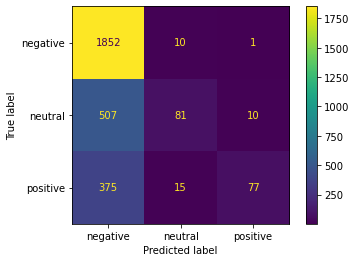

In [159]:
#MULTINOMIALNB

report(nb)

              precision    recall  f1-score   support

    negative       0.81      0.94      0.87      1863
     neutral       0.66      0.45      0.53       598
    positive       0.78      0.63      0.70       467

    accuracy                           0.79      2928
   macro avg       0.75      0.67      0.70      2928
weighted avg       0.78      0.79      0.77      2928



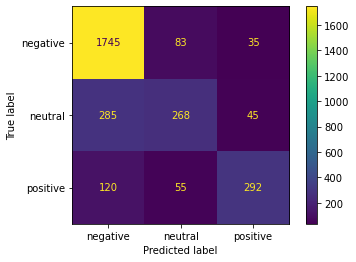

In [160]:
#LOGISTIC_REGRESSION_MODEL

report(lr)

              precision    recall  f1-score   support

    negative       0.79      0.96      0.87      1863
     neutral       0.70      0.38      0.49       598
    positive       0.80      0.61      0.69       467

    accuracy                           0.78      2928
   macro avg       0.77      0.65      0.69      2928
weighted avg       0.78      0.78      0.76      2928



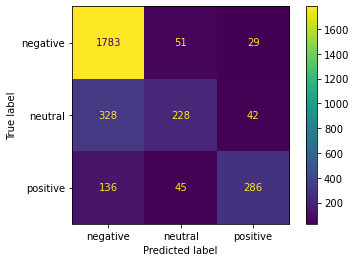

In [163]:
#SVC MODEL

report(svc)

In [ ]:
# DECISION TREE MODEL

              precision    recall  f1-score   support

    negative       0.79      0.79      0.79      1863
     neutral       0.40      0.41      0.41       598
    positive       0.57      0.57      0.57       467

    accuracy                           0.68      2928
   macro avg       0.59      0.59      0.59      2928
weighted avg       0.68      0.68      0.68      2928



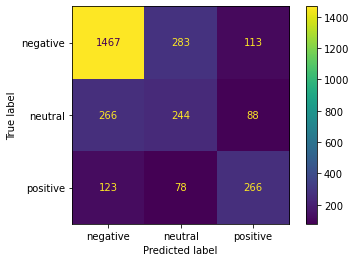

In [167]:
report(dt)

In [173]:
pipe = Pipeline([('tfid',TfidfVectorizer()),('LR',LogisticRegression())])

In [174]:
pipe.fit(X,y)

/home/italosimoesrj/anaconda3/envs/Machine_Learning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfid', TfidfVectorizer()), ('LR', LogisticRegression())])

In [175]:
pipe.predict(['ok flight'])

array(['neutral'], dtype=object)